# K-means

在本练习中，我们将实现K-means聚类，并使用它来压缩图像。 我们将从一个简单的2D数据集开始，以了解K-means是如何工作的，然后我们将其应用于图像压缩。 

## K-means 聚类

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.io as sio

## 1.可视化数据

In [2]:
raw_data = sio.loadmat('data/ex7data2.mat')
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

In [3]:
data = pd.DataFrame(raw_data['X'],columns=['x1','x2'])
data.head()

,x1,x2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


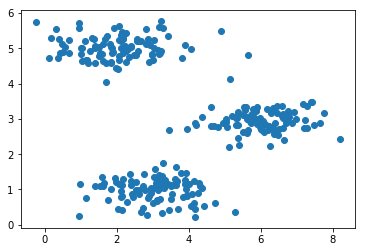

In [4]:
fig,ax = plt.subplots()
ax.scatter(data['x1'],data['x2'])
plt.show()

可以观察到数据还是比较常规的，大致分为3类

## 实现K-means

In [5]:
#针对2D数据
def find_closest_centroids(x,centroids):
    m = x.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((x[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

In [6]:
initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
x = raw_data['X']
idx = find_closest_centroids(x, initial_centroids)
idx[0:3]

array([0., 2., 1.])

In [7]:
def compute_centroids(x,idx,k):
    m,n = x.shape
    centroids = np.zeros((k,n))
    
    for i in range(k):
        indices = np.where(idx == i)
#         centroids[i,:] = (np.sum(x[indices,:],axis=1) / len(indices[0])).ravel()
        centroids[i,:] = np.mean(x[indices,:],axis=1) #经试验是正确的
    return centroids

In [8]:
compute_centroids(x,idx,3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [9]:
def run_k_means(x,initial_centroids,max_iters):
    m,n = x.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(x,centroids)
        centroids = compute_centroids(x,idx,k)
    return idx,centroids

In [10]:
idx, centroids = run_k_means(x, initial_centroids, 10)#由于用循环完成，10次迭代依然费时

In [11]:
centroids

array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

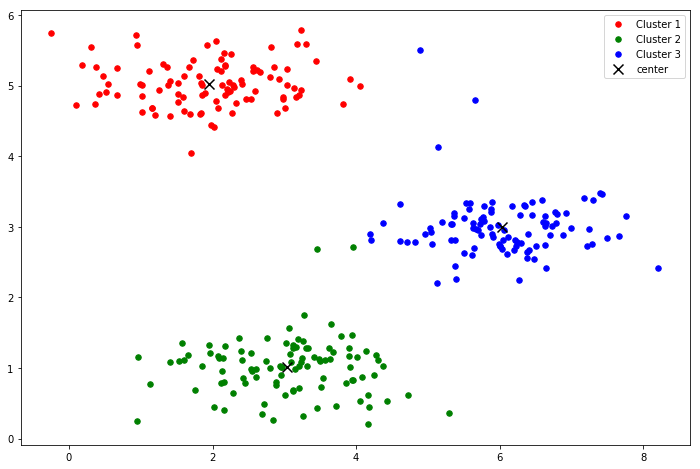

In [12]:
cluster1 = x[np.where(idx == 0)[0],:]
cluster2 = x[np.where(idx == 1)[0],:]
cluster3 = x[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.scatter(centroids[:,0],centroids[:,1],s=100,color='black',marker='x',label='center')
ax.legend()
plt.show()

## 随机初始化

In [13]:
def init_centroids(x,k):
    m,n = x.shape
    centroids = np.zeros((k,n))
    
    idx = np.random.randint(0,m,k)
    
    for i in range(k):
        centroids[i,:] = x[idx[i],:]
    return centroids  

In [14]:
init_centroids(x, 3)

array([[2.96979716, 1.01210306],
       [4.1590816 , 0.61720733],
       [2.14491101, 1.13582399]])

## 使用K-means 压缩图像

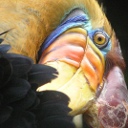

In [15]:
from IPython.display import Image
Image(filename='data/bird_small.png')

In [16]:
image_data = sio.loadmat('data/bird_small.mat')
image_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [17]:
data = image_data['A']
data.shape

(128, 128, 3)

对数据进行预处理，并将其提供给K-means

In [18]:
#归一化值范围
data = data / 255

#reshape
x = np.reshape(data,(data.shape[0] * data.shape[0],data.shape[2]))
x.shape

(16384, 3)

In [19]:
initial_centroids = init_centroids(x,16)

idx,centroids = run_k_means(x,initial_centroids,10)

idx = find_closest_centroids(x,centroids)

x_recovered = centroids[idx.astype(int),:]
x_recovered.shape

(16384, 3)

In [20]:
x_recovered = np.reshape(x_recovered, (data.shape[0], data.shape[1], data.shape[2]))
x_recovered.shape

(128, 128, 3)

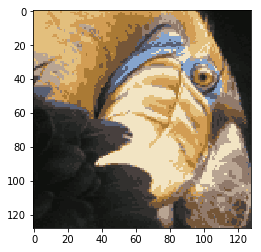

In [21]:
plt.imshow(x_recovered)
plt.show()

## scikit-learn实现

可以看到我们对图像进行了压缩，但图像的主要特征仍然存在。 这就是K-means。 下面我们来用scikit-learn来实现K-means。

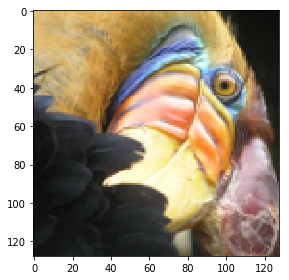

In [22]:
from skimage import io

#imshow with RGB data ([0..1] for floats or [0..255] for integers
#在这不/255 需要在后面转为int才能显示
pic = io.imread('data/bird_small.png') / 255.
io.imshow(pic)
plt.show()

In [23]:
pic.shape

(128, 128, 3)

In [24]:
data = pic.reshape(128*128, 3)
data.shape

(16384, 3)

In [25]:
from sklearn.cluster import KMeans#导入kmeans库

model = KMeans(n_clusters=16, n_init=100, n_jobs=-1)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=100, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
centroids = model.cluster_centers_ #16个主要颜色类
print(centroids.shape)

C = model.predict(data)#每个点属于哪一颜色类
print(C.shape),C,centroids

(16, 3)
(16384,)


(None,
 array([9, 9, 9, ..., 0, 0, 0]),
 array([[0.16696007, 0.16755641, 0.15938648],
        [0.70111672, 0.6297603 , 0.56271428],
        [0.96373629, 0.85964788, 0.63211839],
        [0.38594892, 0.45604515, 0.64401997],
        [0.46532704, 0.33453557, 0.18094747],
        [0.91847309, 0.57214852, 0.25300793],
        [0.28971169, 0.26124545, 0.2585174 ],
        [0.65312102, 0.47442646, 0.21310699],
        [0.82765909, 0.74641824, 0.73735896],
        [0.86988249, 0.71837397, 0.45697684],
        [0.9769581 , 0.94613041, 0.81795175],
        [0.45978072, 0.38817181, 0.35435743],
        [0.58783522, 0.50094082, 0.44821067],
        [0.75960168, 0.6092652 , 0.34394805],
        [0.56753813, 0.71903206, 0.86830065],
        [0.08519393, 0.0922798 , 0.08210093]]))

In [27]:
centroids[C].shape

(16384, 3)

In [28]:
compressed_pic = centroids[C].reshape((128,128,3))
# compressed_pic = compressed_pic.astype(int) #没/255 需转为int 不然无法显示
compressed_pic

array([[[0.86988249, 0.71837397, 0.45697684],
        [0.86988249, 0.71837397, 0.45697684],
        [0.86988249, 0.71837397, 0.45697684],
        ...,
        [0.08519393, 0.0922798 , 0.08210093],
        [0.08519393, 0.0922798 , 0.08210093],
        [0.08519393, 0.0922798 , 0.08210093]],

       [[0.86988249, 0.71837397, 0.45697684],
        [0.86988249, 0.71837397, 0.45697684],
        [0.86988249, 0.71837397, 0.45697684],
        ...,
        [0.08519393, 0.0922798 , 0.08210093],
        [0.08519393, 0.0922798 , 0.08210093],
        [0.08519393, 0.0922798 , 0.08210093]],

       [[0.86988249, 0.71837397, 0.45697684],
        [0.86988249, 0.71837397, 0.45697684],
        [0.86988249, 0.71837397, 0.45697684],
        ...,
        [0.08519393, 0.0922798 , 0.08210093],
        [0.08519393, 0.0922798 , 0.08210093],
        [0.08519393, 0.0922798 , 0.08210093]],

       ...,

       [[0.08519393, 0.0922798 , 0.08210093],
        [0.08519393, 0.0922798 , 0.08210093],
        [0.08519393, 0

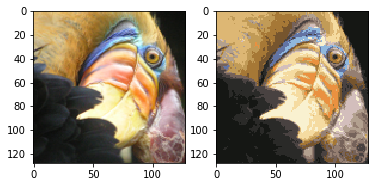

In [29]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)
plt.show()